# CAP 4910 Project 1 - PCA

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.options.display.max_columns = 999

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [64]:
cancer = load_breast_cancer()

In [65]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [66]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

<span class="birk">Q1. Define DataFrame df using cancer dataset</span>

In [67]:
# Enter your code here:
df = pd.DataFrame(cancer.data, columns= cancer.feature_names)

<span class="birk">Q2. Display df</span>

In [68]:
# Enter your code here:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<span class="birk">Q3. Display cancer target column.</span>

In [69]:
# Enter your code here:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

<span class="birk">Q4. Set df target equal cancer target.</span>

In [70]:
# Enter your code here:
df['target']= cancer['target']

<span class="birk">Q5. Describe df</span>

In [71]:
# Enter your code here:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### change benign to 0 and malignant to 1

In [72]:
def correct_label(target):
    if target == 0:
        return 1
    else:
        return 0

In [73]:
df['target']=df['target'].apply(correct_label)

# EDA

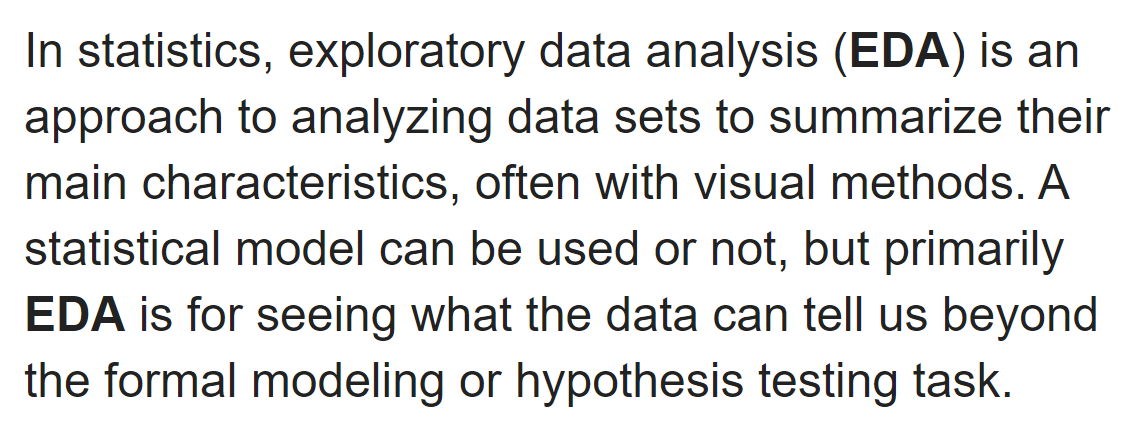

<span class="birk">Q6. Use sns to count plot df target.</span>

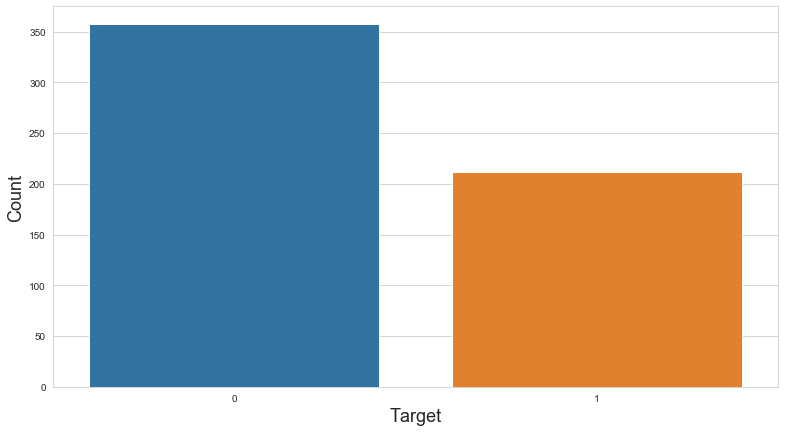

In [74]:
# Enter your code here:
import seaborn as sns

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['target'],label='Count',ax=ax, data=df)
plt.xlabel('Target', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

### There are Class Distribution: 212 - Malignant, 357 - Benign

Text(0.5, 1.0, 'Worst Area vs. Worst Perimeter by Target')

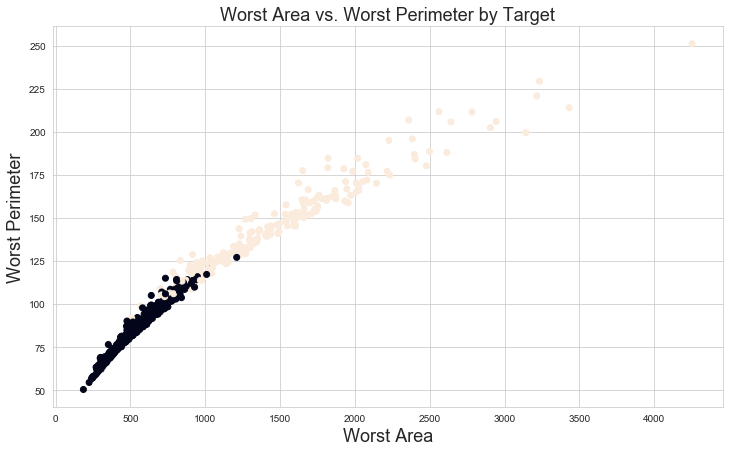

In [75]:
plt.figure(figsize=(12,7))
plt.scatter(df['worst area'], df['worst perimeter'], c=df['target'])
plt.xlabel('Worst Area', fontsize=18)
plt.ylabel('Worst Perimeter', fontsize=18)
plt.title('Worst Area vs. Worst Perimeter by Target',fontsize=18)


Text(22.34977213541667, 0.5, 'Worst Area')

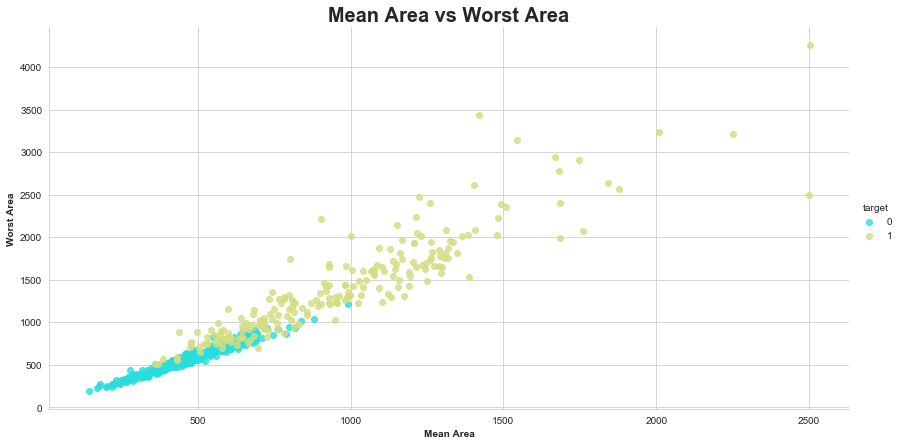

In [76]:
sns.lmplot(x='mean area', y='worst area',data=df, hue='target',fit_reg=False, height=6, aspect=2, palette='rainbow')

ax = plt.gca()
ax.set_title("Mean Area vs Worst Area", fontdict={'fontsize':20, 'fontweight':'bold'})
ax.set_xlabel("Mean Area", fontdict={'fontsize':10, 'fontweight':'bold'})
ax.set_ylabel("Worst Area", fontdict={'fontsize':10, 'fontweight':'bold'})

In [77]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Text(0.5, 1.0, 'KDE plot for Average perimeter vs Worst Radius depend on Type')

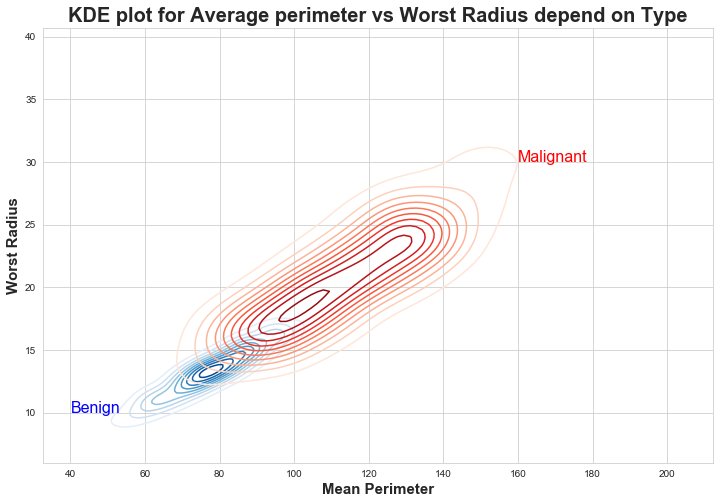

In [78]:
# Set up dataframe for each case
benign=df[df['target']==0]
malignant=df[df['target']==1]

# Set UP figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.kdeplot(benign['mean perimeter'], benign['worst radius'],
                 cmap="Blues", shade_lowest=False)
ax = sns.kdeplot(malignant['mean perimeter'], malignant['worst radius'],
                 cmap="Reds", shade_lowest=False)

# Label
ax.text(160, 30, "Malignant", size=16, color='red')
ax.text(40, 10, "Benign", size=16, color='blue')
ax.set_xlabel("Mean Perimeter", fontdict={'fontsize':15, 'fontweight':'bold'})
ax.set_ylabel("Worst Radius", fontdict={'fontsize':15, 'fontweight':'bold'})
ax.set_title("KDE plot for Average perimeter vs Worst Radius depend on Type", fontdict={'fontsize':20, 'fontweight':'bold'})

# Model

<span class="birk">Q7. Define X as dataset with target column and y as target column.</span>

In [79]:
# Enter your code here:
X = df[df.columns[:-1]]
y=df.target

<span class="birk">Q8. Split X_train, X_test, y_train, y_test with test_size=0.5, random_state=42</span>

In [80]:
# Enter your code here:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size= 0.5, random_state=42)

<span class="birk">Q9. Standardize X_train</span>

In [81]:
# Enter your code here:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [82]:
lr= LogisticRegression(solver='lbfgs')


<span class="birk">Q10. Use lr to train the training dataset.</span>

In [83]:
# Enter your code here:
lr.fit(X_train_std, y_train)

LogisticRegression()

<span class="birk">Q11. Use lr to predict and print confusion_matrix.</span>

In [84]:
# Enter your code here:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

pred = lr.predict(X_test_std)

In [85]:
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

[[185   2]
 [  2  96]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       187
           1       0.98      0.98      0.98        98

    accuracy                           0.99       285
   macro avg       0.98      0.98      0.98       285
weighted avg       0.99      0.99      0.99       285



In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [87]:
scaler=StandardScaler()

scaler.fit(X_train)

Xs_train=scaler.transform(X_train)
Xs_test=scaler.transform(X_test)

In [88]:
lr= LogisticRegression(solver='lbfgs')
lr.fit(Xs_train, y_train)
pred = lr.predict(Xs_test)
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

[[176   1]
 [  7 101]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       177
           1       0.99      0.94      0.96       108

    accuracy                           0.97       285
   macro avg       0.98      0.96      0.97       285
weighted avg       0.97      0.97      0.97       285



## Two random state show different results on different cases, especially on FN, which can mean overfit.  Therefore, I will use PCA to reduce the dimensionality of a data set consisting of many variables correlated with each other.

<span class="birk">Q13. Define pca with n_components=2</span>

In [89]:
# Enter your code here:
pca = PCA(n_components = 2)

<span class="birk">Q14. Train pca</span>

In [90]:
# Enter your code here:
pca.fit(X_train_std)

PCA(n_components=2)

In [91]:
X_train_pca = pca.transform(Xs_train)
X_test_pca = pca.transform(Xs_test)

In [92]:
X_train_pca.shape

(284, 2)

<span class="birk">Q15. Plot pca , cmap='plasma'</span>

Text(0, 0.5, 'Second Principal Component')

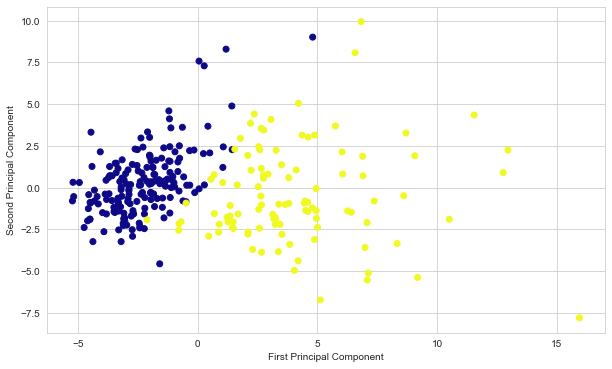

In [93]:
# Enter your code here:
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train,cmap='plasma' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

pca.components_

In [94]:
df_comp=pd.DataFrame(pca.components_, columns=cancer['feature_names'])

In [95]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.221654,0.112257,0.230447,0.224191,0.134552,0.237159,0.261507,0.263595,0.138694,0.047532,0.197512,0.045878,0.202967,0.194860,0.036015,0.170073,0.184631,0.185742,0.063632,0.106647,0.226900,0.110428,0.237098,0.224793,0.115551,0.203584,0.230336,0.250822,0.109197,0.116442
1,-0.230063,-0.037154,-0.211673,-0.227720,0.189687,0.169746,0.048630,-0.037251,0.185103,0.364996,-0.129533,0.123537,-0.102751,-0.162399,0.192352,0.237729,0.184147,0.119667,0.145927,0.281938,-0.221998,-0.009980,-0.200091,-0.220372,0.180566,0.162799,0.097429,-0.003175,0.110898,0.287412


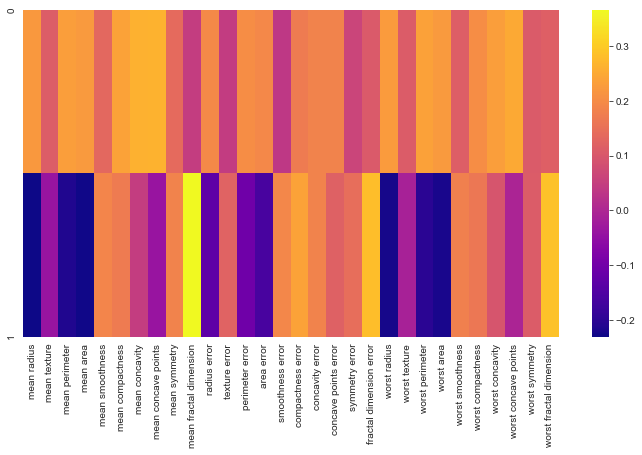

In [96]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')

<span class="birk">Q16. Print pca confusion_matrix</span>

In [97]:
# Enter your code here:
lr = LogisticRegression( solver='lbfgs')
lr.fit(X_train_pca, y_train)
pred = lr.predict(X_test_pca)
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

[[167  10]
 [  8 100]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       177
           1       0.91      0.93      0.92       108

    accuracy                           0.94       285
   macro avg       0.93      0.93      0.93       285
weighted avg       0.94      0.94      0.94       285



In [98]:
pca.explained_variance_ratio_

array([0.4334802 , 0.19321128])